In [80]:
import pandas as pd
import numpy as py
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

# Analysis of Energy Usage

## Loading Data

The first dataset is  



In [4]:
test = pd.read_csv('data/testing.csv')
test.describe

<bound method NDFrame.describe of                      date  Appliances  lights         T1       RH_1  \
0     2016-01-11 17:30:00          50      40  19.890000  46.066667   
1     2016-01-11 18:00:00          60      50  19.890000  45.766667   
2     2016-01-11 18:40:00         230      70  19.926667  45.863333   
3     2016-01-11 18:50:00         580      60  20.066667  46.396667   
4     2016-01-11 19:30:00         100      10  20.566667  53.893333   
...                   ...         ...     ...        ...        ...   
4927  2016-05-27 13:50:00         230       0  25.500000  47.133333   
4928  2016-05-27 14:30:00          60       0  25.566667  46.633333   
4929  2016-05-27 15:50:00         100       0  25.500000  45.633333   
4930  2016-05-27 17:20:00         100       0  25.566667  46.560000   
4931  2016-05-27 17:40:00         270      10  25.500000  46.596667   

             T2       RH_2         T3       RH_3     T4  ...  Press_mm_hg  \
0     19.200000  44.590000  19.79000

The second dataset comes preprepared for training the model.

In [16]:
train = pd.read_csv('data/training.csv')
train.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
NSM              int64
WeekStatus      object
Day_of_week     object
dtype: object

distribution of the response variable. My computer doesn't seem to handle the number of data rows. So I summarise. I also have to convert date to a a datetime data type.

In [22]:
train['datetime']=pd.to_datetime(train["date"])
train['datepart']=train['datetime'].dt.date

date                   object
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
NSM                     int64
WeekStatus             object
Day_of_week            object
datetime       datetime64[ns]
dtype: obj

In [105]:
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week,datetime,datepart,hour,week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,5.3,13.275433,13.275433,61200,Weekday,Monday,2016-01-11 17:00:00,2016-01-11,17,2
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,5.2,18.606195,18.606195,61800,Weekday,Monday,2016-01-11 17:10:00,2016-01-11,17,2
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,5.1,28.642668,28.642668,62400,Weekday,Monday,2016-01-11 17:20:00,2016-01-11,17,2
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,4.9,10.084097,10.084097,63600,Weekday,Monday,2016-01-11 17:40:00,2016-01-11,17,2
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,4.8,44.919484,44.919484,64200,Weekday,Monday,2016-01-11 17:50:00,2016-01-11,17,2


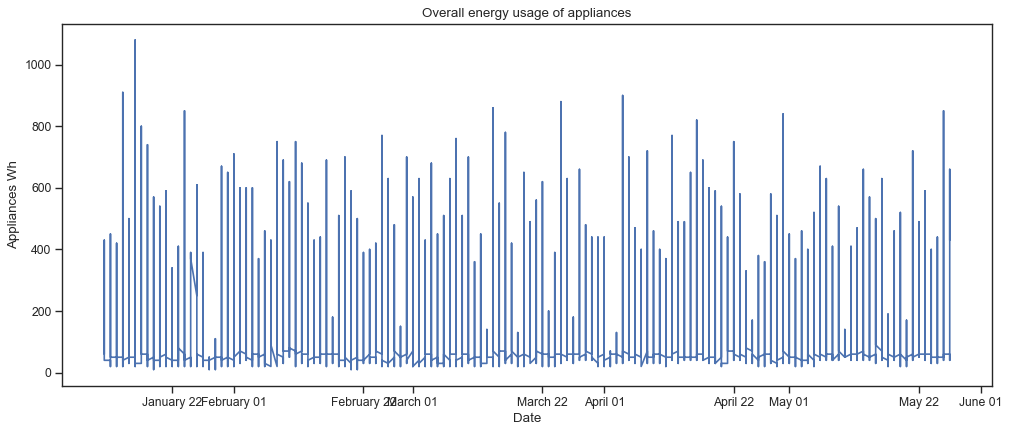

In [119]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax1 = fig.add_subplot()
ax1.set_ylabel('Appliances Wh')
ax1.set_xlabel('Date')
ax1.set_title('Overall energy usage of appliances')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%B %d'))
ax1.plot('datepart', 'Appliances', data=train)

In [ ]:
Fig 1. (A) Appliances energy consumption measurement for the whole period, (B) A closer look at 
the first week of data.

Our Tasks include - Exploring relationships within the features.  

<AxesSubplot:title={'center':'Distribution of load for 10 minute intervals'}, xlabel='Appliances Wh', ylabel='Number of 10 minute intervals'>

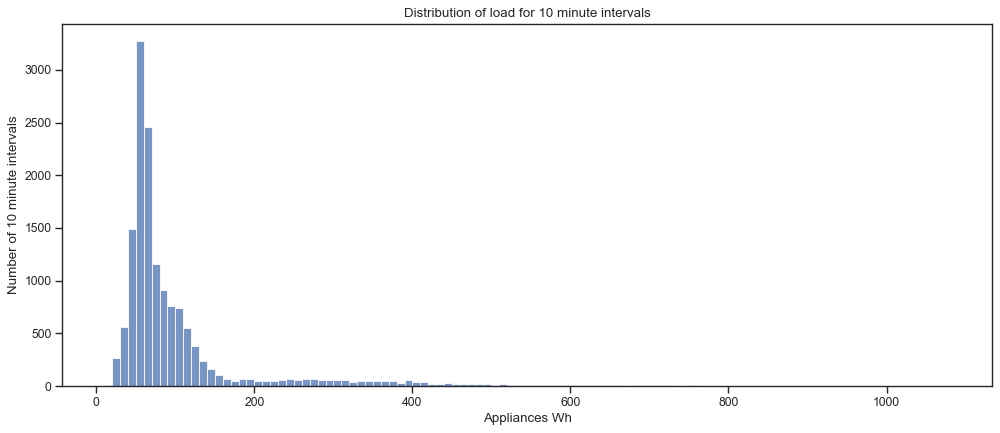

In [83]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax1 = fig.add_subplot()
ax1.set_xlabel('Appliances Wh')
ax1.set_ylabel('Number of 10 minute intervals')
ax1.set_title('Distribution of load for 10 minute intervals')
sns.histplot(data=train,x='Appliances',binwidth=10)

<AxesSubplot:title={'center':'Distribution of load for 10 minute intervals'}, xlabel='Appliances'>

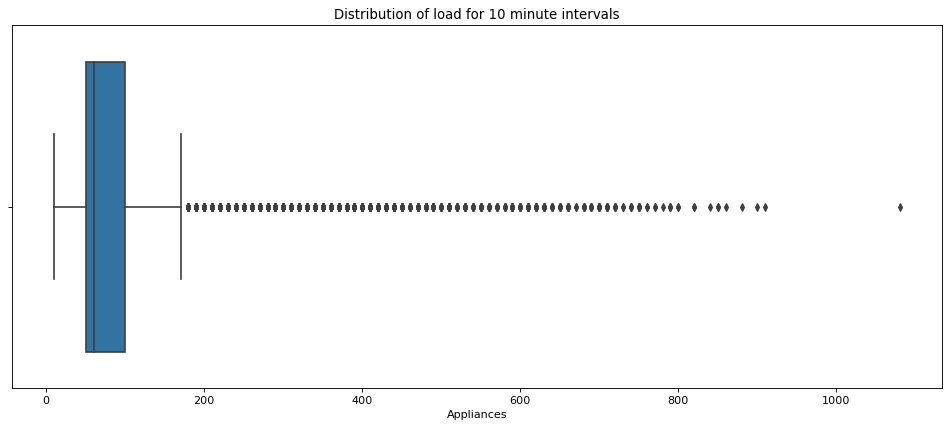

In [51]:
fig = plt.figure(figsize=(15, 6), dpi=80)
ax2 = fig.add_subplot()
ax2.set_xlabel('Appliances Wh')
ax2.set_title('Distribution of load for 10 minute intervals')
sns.boxplot(data=train,x='Appliances',ax=ax2)

In [63]:
#we need to create dummy variables for weekday/weekend variable.
weekstatus_df=pd.get_dummies(train['WeekStatus'])

array([0, 1], dtype=uint8)

In [95]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = py.corrcoef(x, y)[0][1]
    # Make the label
    label = str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.5), size = 50, xycoords = ax.transAxes)

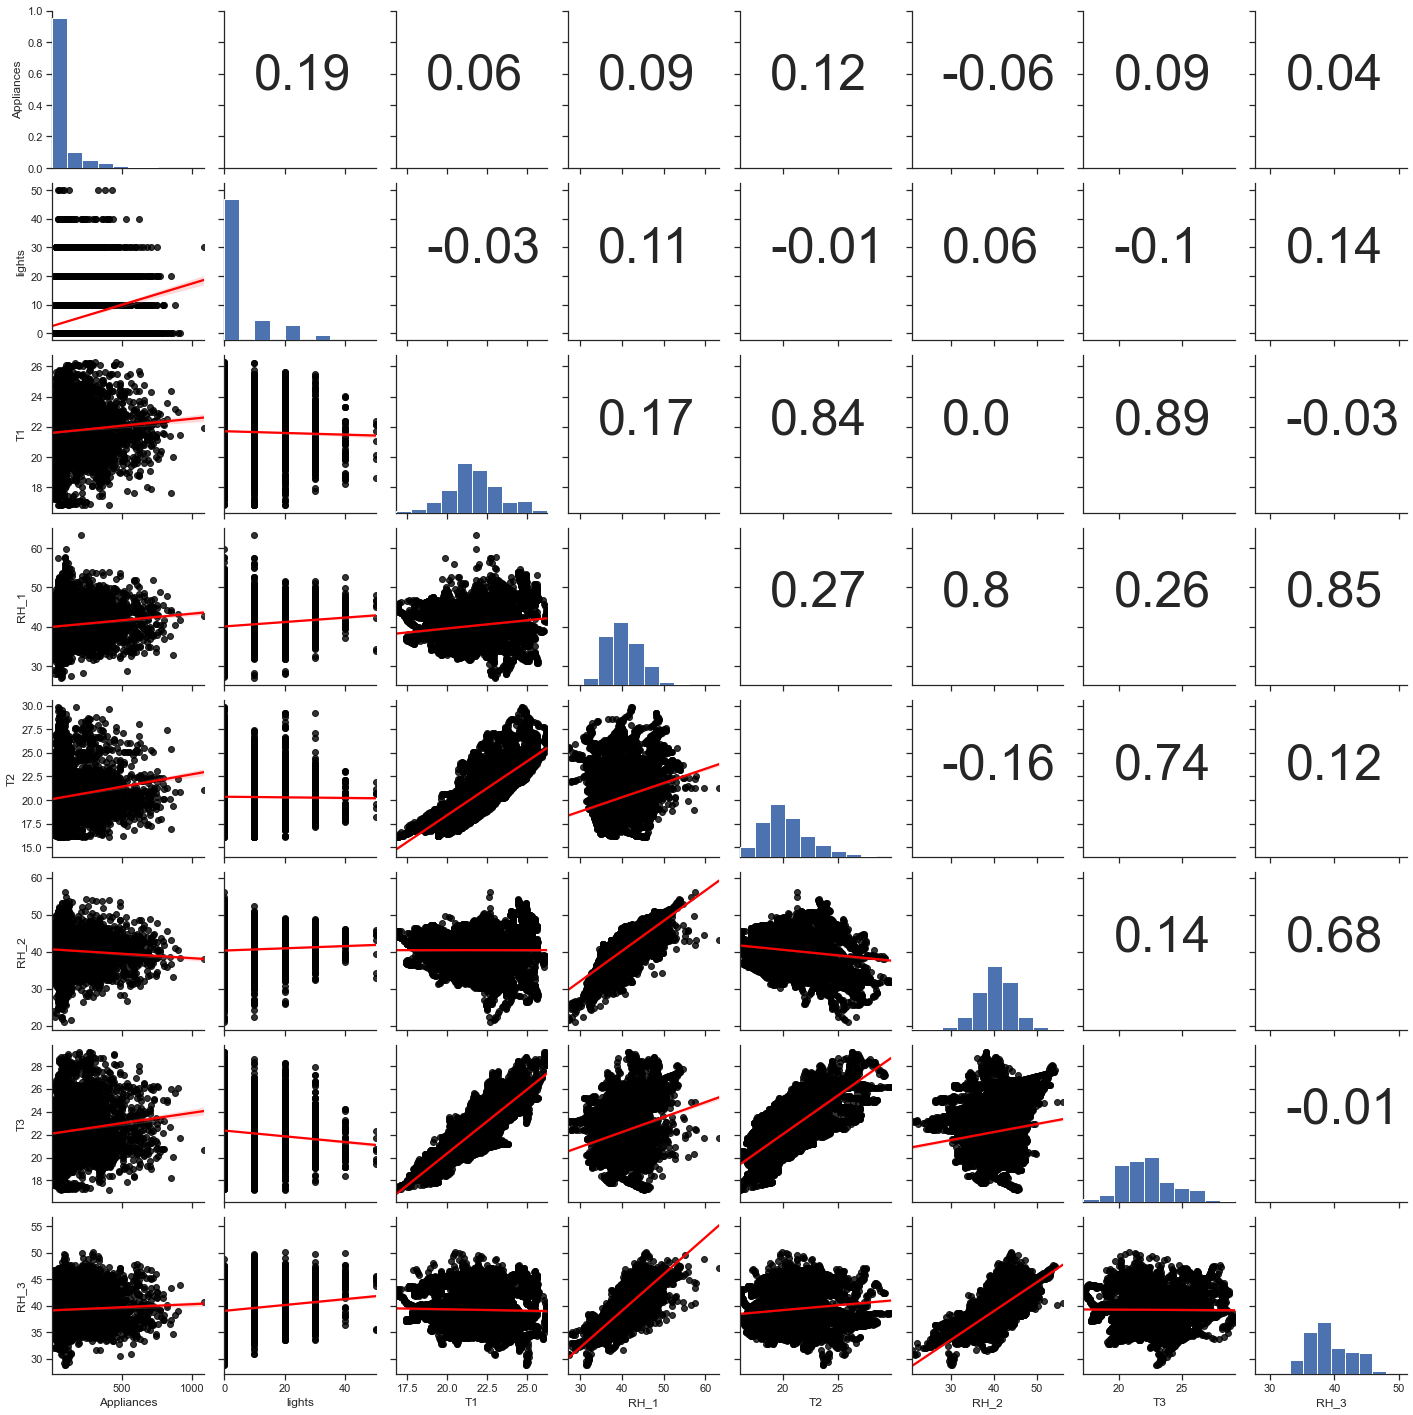

In [98]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= train, vars =["Appliances","lights","T1","RH_1","T2","RH_2","T3","RH_3"])
grid = grid.map_diag(plt.hist)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.regplot,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

Fig. 3 from paper. Pairs plot. Relationship between the energy consumption of appliances with: lights, T1, RH1, 
T2, RH2, T3, RH3. T1 and RH1 correspond to the kitchen conditions; T2and RH2 correspond to the 
living room conditions. We can see that temperatures are highly correlated within the house. Humidities are quite correlated.
However the time period of 10 minute intervals is probably too short given that behaviour of the occupants is driven by longer term factors, and insulation in the house, plus interaction with the outside environment is taking place slower than these short windows.

In [217]:
#summarise by hour for heatmap of usage
train['hour']=train['datetime'].dt.hour
train['weekday']=train['datetime'].dt.weekday
train['week']=train['datetime'].dt.isocalendar().week.astype(int)
train['year']=train['datetime'].dt.isocalendar().year
appliancehr=train[['Appliances','year','week','weekday','Day_of_week','hour']]
appliancesum=appliancehr.groupby(['year','week','weekday','Day_of_week','hour'])[["Appliances"]].sum()
max, min = appliancesum.max(), appliancesum.min()
table = pd.pivot_table(appliancesum.loc[(2016, 3):(2016, 6)], values='Appliances', index=['week','hour'],
                    columns=['weekday','Day_of_week'], aggfunc=py.sum)

In [222]:
table.info

<bound method DataFrame.info of weekday          0       1         2        3      4        5      6
Day_of_week Monday Tuesday Wednesday Thursday Friday Saturday Sunday
week hour                                                           
3    0         270     280       190      200    120      170    130
     1         210     270       190      270    170      140    260
     2         210     150       190      180    200      170    190
     3         200     280       210      300    240      190    270
     4         270     150       200      240    130       60    150
...            ...     ...       ...      ...    ...      ...    ...
6    19        770    1560       560      500    420      980    980
     20        520     750       770      370    610      320    900
     21        340     810       620      380    620      360    520
     22        340     590       490      360    300      310    530
     23        180     350       290      350    230      240    230

[

<AxesSubplot:title={'center':'Week 6'}, xlabel='weekday-Day_of_week', ylabel='hour'>

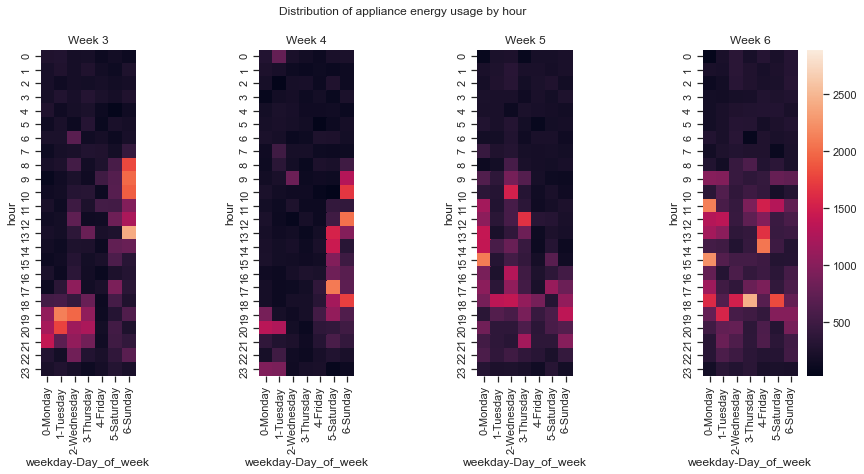

In [226]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(15, 6))
ax1.set_title('Week 3')
ax2.set_title('Week 4')
ax3.set_title('Week 5')
ax4.set_title('Week 6')
fig.suptitle('Distribution of appliance energy usage by hour')
xticklabs={'Mon','Tue','Wed','Thu','Fri','Sat','Sun'}
sns.heatmap(data=table.loc[(3)],square=True,robust=True,ax=ax1,cbar=None,vmin=min,vmax=max)
sns.heatmap(data=table.loc[(4)],square=True,robust=True,ax=ax2,cbar=None,vmin=min,vmax=max)
sns.heatmap(data=table.loc[(5)],square=True,robust=True,ax=ax3,cbar=None,vmin=min,vmax=max)
sns.heatmap(data=table.loc[(6)],square=True,robust=True,ax=ax4,vmin=min,vmax=max)

By looking at 4 consequetive weeks we see the pattern of low energy usage before 8am, and high on some days throughout, whereas on other days it is only in the morning or evening that usage is high. 

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv2,NSM,WeekStatus,Day_of_week,datetime,datepart,hour,week,weekday,year
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,61200,Weekday,Monday,2016-01-11 17:00:00,2016-01-11,17,2,0,2016
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,61800,Weekday,Monday,2016-01-11 17:10:00,2016-01-11,17,2,0,2016
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,62400,Weekday,Monday,2016-01-11 17:20:00,2016-01-11,17,2,0,2016
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,63600,Weekday,Monday,2016-01-11 17:40:00,2016-01-11,17,2,0,2016
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,44.919484,64200,Weekday,Monday,2016-01-11 17:50:00,2016-01-11,17,2,0,2016


In [ ]:
#my computer can't handle this SVR estimator. It takes a very long time.

In [240]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X_train = train.drop(['Appliances','lights','datepart','datetime','date','Day_of_week','WeekStatus'],axis=1)
y_train= train['Appliances']
#estimator = SVR(kernel="linear")
estimator=linear_model.LinearRegression()
selector = RFE(estimator, n_features_to_select=.5, step=1)
selector = selector.fit(X, y)

ValueError: Found array with 1 feature(s) (shape=(14803, 1)) while a minimum of 2 is required.

In [250]:
reg = linear_model.LinearRegression()
predictors=['lights','T1','RH_1','T2','T3','RH_3','T4','RH_4','T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out',
          'Press_mm_hg', 'RH_out','Windspeed','Visibility','Tdewpoint','rv1','rv2','NSM']
X = train[predictors]
y = train['Appliances']
y_test=test['Appliances']
X_test=test[predictors]
reg.fit(X, y)

LinearRegression()

In [251]:
predicted=reg.predict(X_test)
r2 = r2_score(y_test, predicted)
MSE = mean_squared_error(y_test,predicted)
print("R Squared:", r2)
print("sklearn function MSE:", MSE)
reg.coef_

R Squared: 0.1410843091022993
sklearn function MSE: 8866.871094665616


array([ 1.95508142e+00, -1.84314243e+01,  5.94265786e+00,  6.53303306e+00,
        2.78492758e+01,  4.07172722e+00, -4.18607300e+00, -3.53885996e+00,
       -2.76673010e+00,  4.05664895e-02,  6.53944014e+00,  3.62646745e-01,
        4.01143222e+00, -2.39233276e+00,  7.75044787e+00, -2.85207309e+00,
       -1.93176601e+01, -7.77253855e-01, -7.38509574e+00,  2.02891196e-01,
       -7.41018812e-01,  2.15281717e+00,  1.28083797e-01,  1.03987809e+00,
       -2.29324199e-02, -2.29324199e-02,  3.09057609e-04])

In [ ]:

def createmodel(f):
    rfe=RFE(estimator=model,n_features_to_select=f,step=1)
    rfe.fit(X_train,y_train)
    y_feature_predict=rfe.predict(X_test)
    print ("R sq of ",f, " feature prediction on the testing data:", r_square(y_test,y_feature_predict))
    print("features selected:" , list(X_train.columns[rfe.get_support()]))